In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
# load the datasset
dataset = pd.read_csv(r"C:\Users\Dell\Downloads\emp_sal.csv")
dataset

,Position,Level,Salary
0,Jr Software Engineer,1,45000
1,Sr Software Engineer,2,50000
2,Team Lead,3,60000
3,Manager,4,80000
4,Sr manager,5,110000
5,Region Manager,6,150000
6,AVP,7,200000
7,VP,8,300000
8,CTO,9,500000
9,CEO,10,1000000


In [6]:
# Divide the dataset into dependent variable & independent variable
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [10]:
# Split the data into 80% training & 20% test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state = 0)

In [13]:
# check the model is either linear or non linear
# Train the model
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

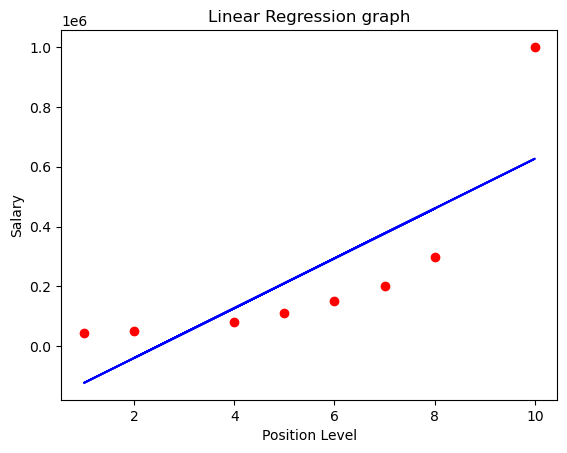

In [15]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lin_reg.predict(x_train), color = 'blue')
plt.title('Linear Regression graph')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [16]:
lin_model_pred = lin_reg.predict([[6.5]])
print(lin_model_pred)

[335474.55968689]


In [37]:
# we will be using polynomial model
mse_scores = {}

for d in range(1,6):
    poly = PolynomialFeatures(degree = d)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    model = LinearRegression()
    model.fit(x_train_poly,y_train)

    y_pred = model.predict(x_test_poly)
    mse = mean_squared_error(y_test, y_pred)

    mse_scores[d] = mse

In [41]:
# Print MSE
for d, mse in mse_scores.items():
    print(f"Degree {d} -> MSE : {mse}")

Degree 1 -> MSE : 1068599327.5148293
Degree 2 -> MSE : 14254734714.329031
Degree 3 -> MSE : 6192146372.862302
Degree 4 -> MSE : 1487932926.8068807
Degree 5 -> MSE : 272664227.2886918


In [42]:
# Automatically select BEST degree
best_degree = min(mse_scores, key = mse_scores.get)
print("Best Degree:",best_degree)

Best Degree: 5


In [44]:
# poly.fit_transform(x)
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)

final_model = LinearRegression()
final_model.fit(X_poly, y)

LinearRegression()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15436\355287956.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x), max(x), 0.1).reshape(-1, 1)


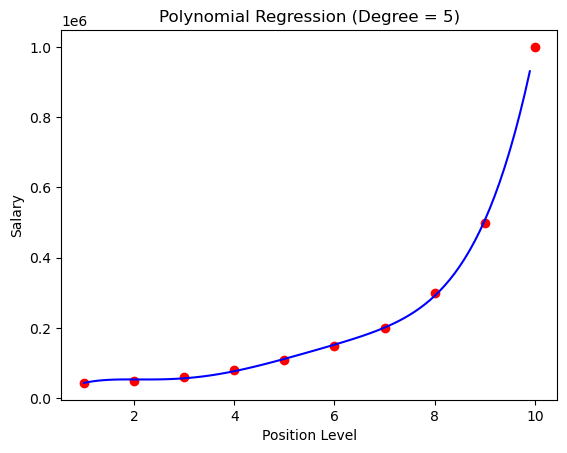

In [45]:
# Plot Polynomial Regression Curve

x_grid = np.arange(min(x), max(x), 0.1).reshape(-1, 1)

plt.scatter(x, y, color='red')
plt.plot(x_grid, final_model.predict(poly.transform(x_grid)), color='blue')
plt.title(f'Polynomial Regression (Degree = {best_degree})')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

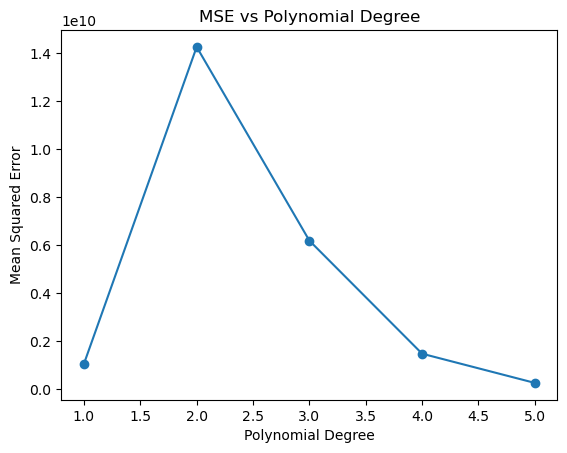

In [46]:
# Plot MSE vs Degree
plt.plot(mse_scores.keys(), mse_scores.values(), marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.show()

In [47]:
# Prediction for new value
prediction = final_model.predict(poly.transform([[6.5]]))
print("Predicted Salary:", prediction)

Predicted Salary: [174878.07765118]
